In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix


# Home Assignment 1 - Regression and Classification Models

Aim:

    Students should provide the best possible regression and classification models using Decision Trees and Linear models
    Models should examine different hyperparameters and select the best one [Remember: everything else being similar, the simplest models should be prefered]
    It is expected a full testing and validation cycle of model selection and evaluation

Objective 1

    Produce the best regression model for critical_temp (Dependent Variable)

Objective 2

    Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases


#### 0.1. Data Preparation

In [80]:
# Load data
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

In [81]:
# Check data
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.0
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.0
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.5
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.0
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.0


In [82]:
# Check if any column has a missing value overall (not per row)
print(df.isnull().values.any())

False


**Note to self:** 
To scale or not to scale -  Algorithms that Don't Require Scaling:

    Tree-Based Algorithms: Decision trees, random forests, and gradient boosting algorithms (e.g., XGBoost) are not sensitive to feature scaling because they make decisions based on feature thresholds.
    Naive Bayes: Naive Bayes classifiers are not affected by feature scaling because they estimate class probabilities based on feature distributions.

#### 0.2: Explorative Data Analysis

Before splitting the data, exploratory data analysis (EDA) should be performed to understand the characteristics of the dataset, including checking for linearity.
Visualizations like scatter plots, correlation matrices, or regression diagnostic plots can help assess the linearity between the target variable and predictor variables.

#### 0.3: Data Splitting

In [83]:
# DATA SPLITTING #

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('critical_temp', axis=1), df['critical_temp'], test_size=0.2, random_state=42)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# X_train, y_train: Training data
# X_val, y_val: Validation data
# X_test, y_test: Test data

### **Objective 1** - Produce the best regression model for critical_temp (Dependent Variable)

#### 1.1: Model training, testing and evaluation

In [6]:
# LINEAR REGRESSION MODEL #

# Train model
reg1 = LinearRegression().fit(X_train, y_train)

# Predict on validation set
y_pred1_val = reg1.predict(X_val)

# Predict on test set
y_pred1_test = reg1.predict(X_test)


In [7]:
# RIDGE REGRESSION MODEL #

# Train model
reg2 = Ridge(alpha=1.0).fit(X_train, y_train) # alpha=1.0 is default

# Predict on validation set
y_pred2_val = reg2.predict(X_val)

# Predict on test set
y_pred2_test = reg2.predict(X_test)

In [8]:
# LASSO REGRESSION MODEL #

# Train model
reg3 = Lasso(alpha=1.0).fit(X_train, y_train) # alpha=1.0 is default

# Predict on validation set
y_pred3_val = reg3.predict(X_val)

# Predict on test set
y_pred3_test = reg3.predict(X_test)

In [9]:
# SUPPORT VECTOR MACHINE REGRESSION MODEL #

# Train model
reg4 = svm.SVR().fit(X_train, y_train)

# Predict on validation set
y_pred4_val = reg4.predict(X_val)

# Predict on test set
y_pred4_test = reg4.predict(X_test)

In [10]:
# RANDOM FOREST REGRESSION MODEL #

# Train model
reg5 = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train) # max_depth=2 is default

# Predict on validation set
y_pred5_val = reg5.predict(X_val)

# Predict on test set
y_pred5_test = reg5.predict(X_test)

In [11]:
# GRADIENT BOOSTING REGRESSION MODEL #

# Train model
reg6 = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# Predict on validation set
y_pred6_val = reg6.predict(X_val)

# Predict on test set
y_pred6_test = reg6.predict(X_test)

In [12]:
# NEURAL NETWORK REGRESSION MODEL #

# Train model
reg7 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train) # max_iter=500 is default

# Predict on validation set
y_pred7_val = reg7.predict(X_val)

# Predict on test set
y_pred7_test = reg7.predict(X_test)

#### 1.2: Results

In [13]:
# Table with the results of the models

# List with the names of the models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Machine Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Neural Network Regression']

# List with the VALIDATION predictions of the models
predictions_val = [y_pred1_val, y_pred2_val, y_pred3_val, y_pred4_val, y_pred5_val, y_pred6_val, y_pred7_val]

# List with the TEST predictions of the models
predictions_test = [y_pred1_test, y_pred2_test, y_pred3_test, y_pred4_test, y_pred5_test, y_pred6_test, y_pred7_test]


# Lists with the mean squared error, mean absolute error and R2 scores of the models for the VALIDATION set
mse_val = [mean_squared_error(y_val, y_pred1_val), mean_squared_error(y_val, y_pred2_val), mean_squared_error(y_val, y_pred3_val), mean_squared_error(y_val, y_pred4_val), mean_squared_error(y_val, y_pred5_val), mean_squared_error(y_val, y_pred6_val), mean_squared_error(y_val, y_pred7_val)]
mae_val = [mean_absolute_error(y_val, y_pred1_val), mean_absolute_error(y_val, y_pred2_val), mean_absolute_error(y_val, y_pred3_val), mean_absolute_error(y_val, y_pred4_val), mean_absolute_error(y_val, y_pred5_val), mean_absolute_error(y_val, y_pred6_val), mean_absolute_error(y_val, y_pred7_val)]
r2_val = [r2_score(y_val, y_pred1_val), r2_score(y_val, y_pred2_val), r2_score(y_val, y_pred3_val), r2_score(y_val, y_pred4_val), r2_score(y_val, y_pred5_val), r2_score(y_val, y_pred6_val), r2_score(y_val, y_pred7_val)]

# Lists with the mean squared error, mean absolute error and R2 scores of the models for the TEST set
mse_test = [mean_squared_error(y_test, y_pred1_test), mean_squared_error(y_test, y_pred2_test), mean_squared_error(y_test, y_pred3_test), mean_squared_error(y_test, y_pred4_test), mean_squared_error(y_test, y_pred5_test), mean_squared_error(y_test, y_pred6_test), mean_squared_error(y_test, y_pred7_test)]
mae_test = [mean_absolute_error(y_test, y_pred1_test), mean_absolute_error(y_test, y_pred2_test), mean_absolute_error(y_test, y_pred3_test), mean_absolute_error(y_test, y_pred4_test), mean_absolute_error(y_test, y_pred5_test), mean_absolute_error(y_test, y_pred6_test), mean_absolute_error(y_test, y_pred7_test)]
r2_test = [r2_score(y_test, y_pred1_test), r2_score(y_test, y_pred2_test), r2_score(y_test, y_pred3_test), r2_score(y_test, y_pred4_test), r2_score(y_test, y_pred5_test), r2_score(y_test, y_pred6_test), r2_score(y_test, y_pred7_test)]


# Create a table with the results of the models
results = pd.DataFrame({'Model': models, 'MSE_val': mse_val, 'MAE_val': mae_val, 'R2_val': r2_val, 'MSE_test': mse_test, 'MAE_test': mae_test, 'R2_test': r2_test})

# Show table
results

,Model,MSE_val,MAE_val,R2_val,MSE_test,MAE_test,R2_test
0,Linear Regression,321.606932,13.482611,0.721163,318.301027,13.477590,0.734052
1,Ridge Regression,322.156803,13.493189,0.720686,318.357827,13.474752,0.734004
2,Lasso Regression,413.760681,15.791679,0.641264,420.433739,15.918221,0.648717
3,Support Vector Machine Regression,283.124838,11.009507,0.754527,276.635383,10.781348,0.768864
4,Random Forest Regression,400.575481,13.930317,0.652696,400.327484,13.842441,0.665517
5,Gradient Boosting Regression,161.492673,8.762222,0.859984,161.898239,8.625037,0.864730
6,Neural Network Regression,172.406375,8.810090,0.850521,169.740976,8.642093,0.858177


Gradient Boosting and Neural Network Regression appear to be the top-performing models, with the lowest error metrics and the highest R2 values on both the validation and test sets. These models demonstrate a better ability to predict the target variable compared to the other models in the evaluation.

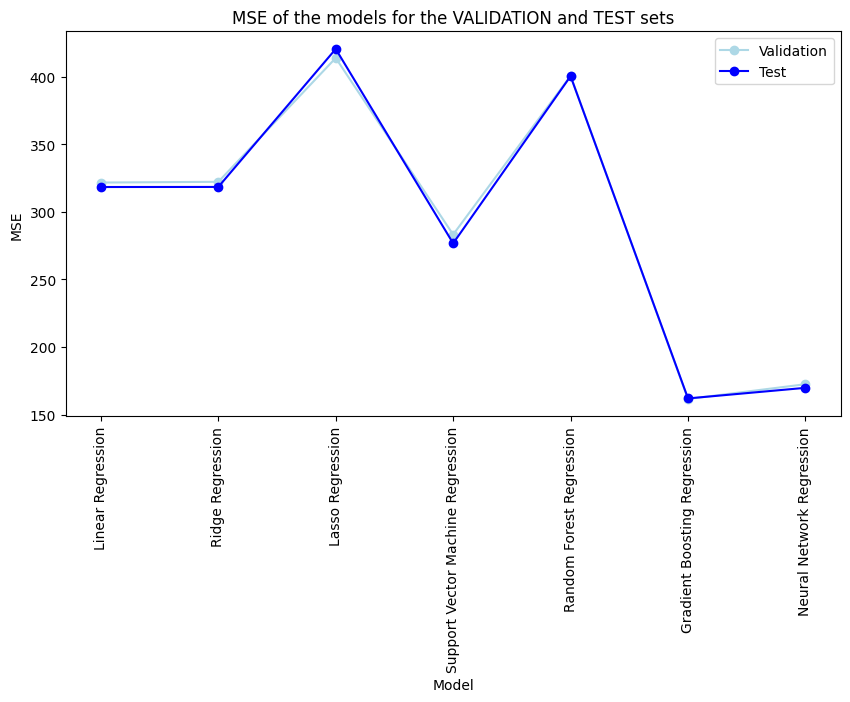

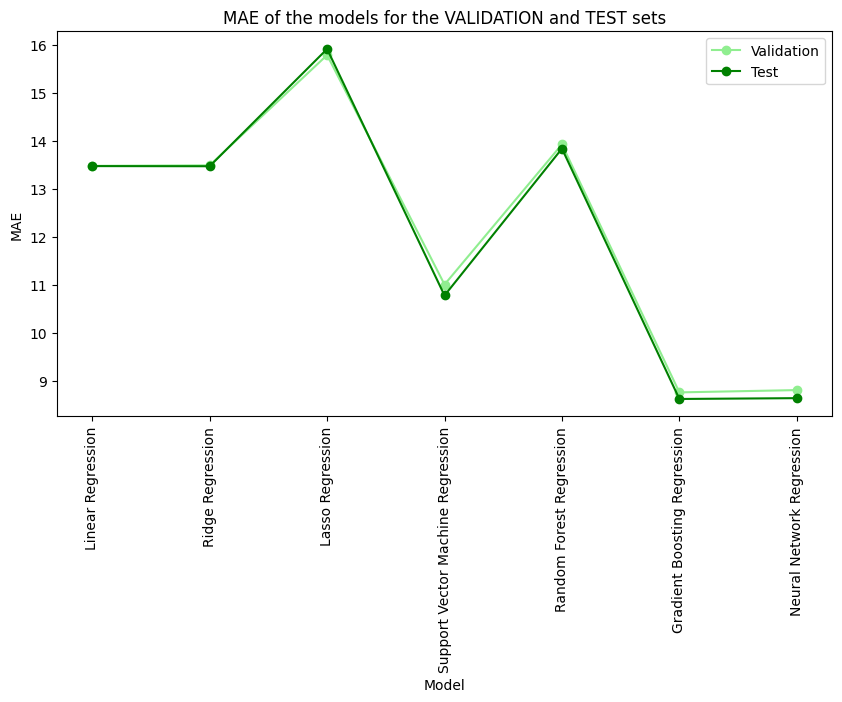

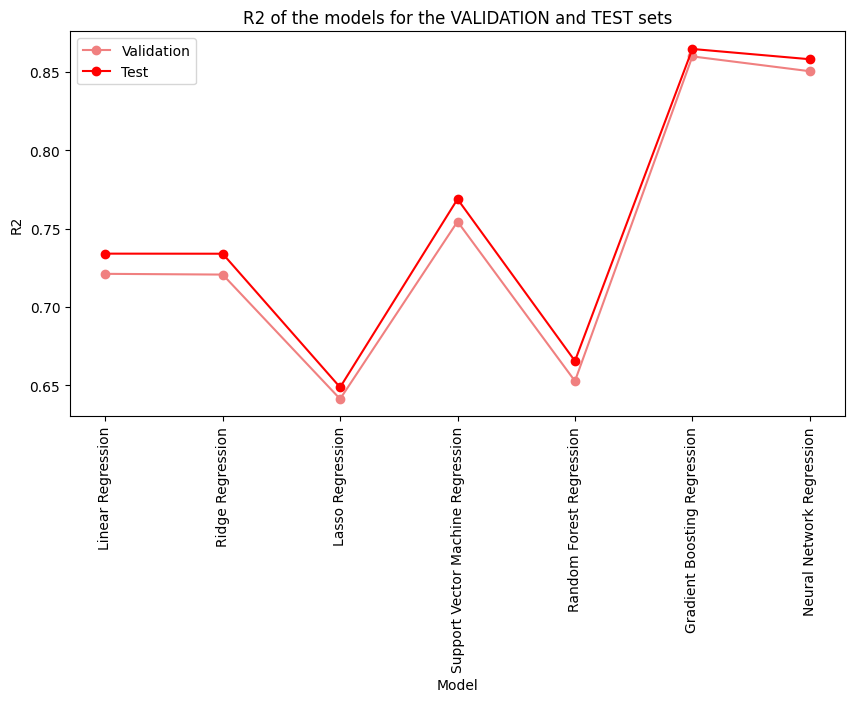

In [14]:
# Compare the results of the models

# Plot the MSE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in pastel blues
plt.plot(models, mse_val, marker='o', color='lightblue')
plt.plot(models, mse_test, marker='o', color='blue')
plt.title('MSE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the MAE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in light green tones
plt.plot(models, mae_val, marker='o', color='lightgreen')
plt.plot(models, mae_test, marker='o', color='green')
plt.title('MAE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the R2 of both validation and test sets
plt.figure(figsize=(10,5))
# plot in red tones
plt.plot(models, r2_val, marker='o', color='lightcoral')
plt.plot(models, r2_test, marker='o', color='red')
plt.title('R2 of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

### **Objective 2** - Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases

Firstly, we need to transform all the target columns to the binary classification problem instances.

In [84]:
def transform_to_binary(x):
    return 1 if x >= 80 else 0

y_train_bin = y_train.apply(transform_to_binary)
y_val_bin = y_val.apply(transform_to_binary)
y_test_bin = y_test.apply(transform_to_binary)

Now, we'll see what's the ratio of the positive and negative class

In [85]:
y_train_bin.value_counts()

critical_temp
0    11309
1     2242
Name: count, dtype: int64

We can see that the data is imbalanced, we have much more negative (0) observations. Therefore, we will use `F1 score` as our main metric.

#### 2.1 Decision tree

In [86]:
def print_scores(y_true, y_predicted):
    print("The Precision is: %7.4f" % precision_score(y_true, y_predicted))
    print("The Recall is: %7.4f" % recall_score(y_true, y_predicted))
    print("The F1 score is: %7.4f" % f1_score(y_true, y_predicted))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_true, y_predicted))

We will explore different values of the following hyperparameters: `min_samples_leaf`, `max_depth`

In [87]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train_bin)
y_preds = model.predict(X_val)
print(print_scores(y_val_bin, y_preds))

The Precision is:  0.8053
The Recall is:  0.7590
The F1 score is:  0.7815
The Matthews correlation coefficient is:  0.7406
None


In [91]:
min_samples_leaf_values = range(2,50,2)
max_depth_values = range(2,50,2)

results = {"min_samples_leaf": [],"max_depth": [], "F1": []}

for max_depth in max_depth_values:
    for min_samples_leaf in min_samples_leaf_values:
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        model.fit(X_train, y_train_bin)
        y_preds = model.predict(X_val)
        f1 = f1_score(y_val_bin, y_preds)

        results["min_samples_leaf"].append(min_samples_leaf)
        results["max_depth"].append(max_depth)
        results["F1"].append(f1)


scores_df = pd.DataFrame(results, index=None)
scores_df = scores_df.sort_values(by="F1", ascending=False)
scores_df

,min_samples_leaf,max_depth,F1
314,6,28,0.802249
434,6,38,0.797732
242,6,22,0.797732
266,6,24,0.797721
386,6,34,0.796226
...,...,...,...
20,42,2,0.294707
21,44,2,0.294707
22,46,2,0.294707
23,48,2,0.294707


We can see that the best combination of hyperparameters is `min_samples_leaf`=6 and `max_depth`=28. When it comes to `min_samples_leaf`, we can see that the value 6 of this parameter is in the top 10 best results. But when it comes to max depth, it varies in the top results and the difference in performance is very small, so we will take a closer look into this parameter.

In [106]:
best_max_depth = scores_df.iloc[0].max_depth
best_min_samples_leaf = int(scores_df.iloc[0].min_samples_leaf)

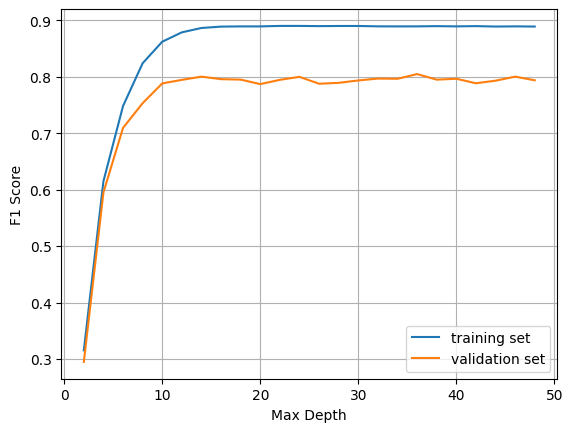

In [112]:
f1_scores_train = []
f1_scores_val = []

for max_depth in max_depth_values:
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=best_min_samples_leaf)
    model.fit(X_train, y_train_bin)
    y_preds_train = model.predict(X_train)
    y_preds_val = model.predict(X_val)
    f1_scores_train.append(f1_score(y_train_bin, y_preds_train))
    f1_scores_val.append(f1_score(y_val_bin, y_preds_val))

plt.plot(max_depth_values, f1_scores_train, label='training set')
plt.plot(max_depth_values, f1_scores_val, label='validation set')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

Based on the plot above we can see that on the validation set we already get good results for `max_depth`~13. With increasing the model complexity to bigger max_depth, we don't get any significant improvements. Thus, we can assume that `max_depth`=13 would be enough.

Final model

In [116]:
best_max_depth = 13

model = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_min_samples_leaf)
model.fit(X_train, y_train_bin)
y_preds_val = model.predict(X_val)
y_preds_test = model.predict(X_test)
print("The F1 score on the validation set is: %7.4f" % f1_score(y_val_bin, y_preds_val))
print("The F1 score on the Independent Validation Set (IVS) is: %7.4f" % f1_score(y_test_bin, y_preds_test))

The F1 score on the validation set is:  0.8000
The F1 score on the Independent Validation Set (IVS) is:  0.7749
